## Model metrics

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [115]:
LOG_PATH = "lightning_logs"
METRICS_PATH = "../Metrics"

In [116]:
def check_folder(save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

def save_metrics_from_logger(model_id,version=0,save=True):
    metrics = pd.read_csv(f"{LOG_PATH}/{model_id}/version_{version}/metrics.csv")
    metrics = metrics.drop(['train_loss_step',	'train_acc_step',	'train_calibration_error_step'],axis=1)
    metrics = metrics.groupby(metrics['epoch']).first()
    if save:
        save_dir = f"{METRICS_PATH}/{model_id}/version_{version}"
        check_folder(save_dir)
        metrics.to_csv(f"{save_dir}/metrics.csv")
    return metrics

def get_metrics_from_csv(model_id,version=0,save=True):
    metrics = pd.read_csv(f"{METRICS_PATH}/{model_id}/version_{version}/metrics.csv")
    return metrics

In [117]:
def plot_metrics(model_id,version=0,show=False,save=True):
    metrics = get_metrics_from_csv(model_id,version)
    train_loss = metrics['train_loss_epoch']
    train_acc = metrics['train_acc_epoch']
    val_loss = metrics['val_loss']
    val_acc = metrics['val_acc']
    epoch = metrics.index

    fig = plt.figure(figsize=(9,4))
    ax1 = fig.add_subplot(221) 
    ax1.plot(epoch,train_loss,linestyle='-', c='orange')
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Train Loss')

    ax2 = fig.add_subplot(222) 
    ax2.plot(epoch,val_loss,linestyle='-', c='violet')
    ax2.set_xlabel('Step')
    ax2.set_ylabel('Validation Loss')

    ax3 = fig.add_subplot(223) 
    ax3.plot(epoch,train_acc,linestyle='-', c='red')
    ax3.set_xlabel('Step')
    ax3.set_ylabel('Train Accuracy')

    ax4 = fig.add_subplot(224) 
    ax4.plot(epoch,val_acc,linestyle='-', c='green')
    ax4.set_xlabel('Step')
    ax4.set_ylabel('Validation Accuracy')
    #plt.tight_layout()
    #fig.suptitle(f"{run_name} (Loss: {test_loss:.2f}, Acc: {test_acc:.2%})")
    fig.suptitle(model_id)
    if save:
        save_dir = f"{METRICS_PATH}/{model_id}/version_{version}"
        check_folder(save_dir)
        plt.savefig(f'{save_dir}/metrics.png',dpi=200)
    if show:
        plt.show()
    else:
        plt.clf()


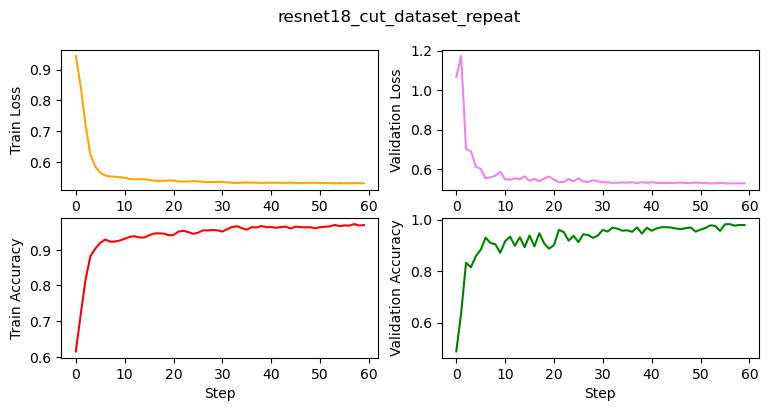

In [118]:
plot_metrics('resnet18_cut_dataset_repeat',show=True)

## Generate cleaned up csv files for each run

In [148]:
model_ids = ['resnet18_cut_dataset_repeat','resnet50_cut_dataset_repeat','jiaresnet50_cut_dataset_repeat','G_ResNet18_cut_dataset_repeat']

for model in model_ids:
    for run in range(5):
        #print(f"{model}, run {run}")
        try:
            save_metrics_from_logger(model,version=run)
        except:
            print(f"Error with {model}, run {run}")
    #plot_metrics(run,show=False)

Error with G_ResNet18_cut_dataset_repeat, run 3
Error with G_ResNet18_cut_dataset_repeat, run 4


## Create graphs for each run

In [142]:
for model in model_ids:
    for run in range(5):
        #print(f"{model}, run {run}")
        try:
            plot_metrics(model,version=run,show=False)
        except:
            print(f"Error with {model}, run {run}")

Error with resnet50_cut_dataset_repeat, run 4
Error with jiaresnet50_cut_dataset_repeat, run 4
Error with G_ResNet18_cut_dataset_repeat, run 2
Error with G_ResNet18_cut_dataset_repeat, run 3
Error with G_ResNet18_cut_dataset_repeat, run 4


<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

<Figure size 900x400 with 0 Axes>

## Get best loss epoch for each run

In [153]:
for model in model_ids:
    best_losses = []
    best_accs = []
    best_eces = []
    for run in range(5):
        try:
            metrics = get_metrics_from_csv(model,version=run)
            best_loss_epoch = metrics['val_loss'].argmin()
            best_losses.append(metrics['val_loss'][best_loss_epoch])
            best_accs.append(metrics['val_acc'][best_loss_epoch])
            best_eces.append(metrics['val_calibration_error'][best_loss_epoch])
        except:
            print(f"Error with {model}, run {run}")
    print(model)
    print(f"Loss: {np.average(best_losses):.4f} ± {np.std(best_losses):.4f}")
    print(f"Accuracy: {np.average(best_accs):.2%} ± {np.std(best_accs):.2%}")
    print(f"ECE: {np.average(best_eces):.4f} ± {np.std(best_eces):.4f}")
    print()

resnet18_cut_dataset_repeat
Loss: 0.5287 ± 0.0002
Accuracy: 97.97% ± 0.22%
ECE: 0.2235 ± 0.0029

resnet50_cut_dataset_repeat
Loss: 0.5305 ± 0.0003
Accuracy: 97.18% ± 0.15%
ECE: 0.2165 ± 0.0019

jiaresnet50_cut_dataset_repeat
Loss: 0.5305 ± 0.0004
Accuracy: 98.29% ± 0.14%
ECE: 0.2320 ± 0.0041

Error with G_ResNet18_cut_dataset_repeat, run 3
Error with G_ResNet18_cut_dataset_repeat, run 4
G_ResNet18_cut_dataset_repeat
Loss: 0.6090 ± 0.0879
Accuracy: 95.21% ± 4.20%
ECE: 0.2411 ± 0.0193

